### 1. Import libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler # # Add standard scaler for data standardization

In [8]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Import data + clean up + keep only numeric variables + rename columns

In [10]:
# Data set path

path = r"/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design"

In [11]:
# Import airbnb listings data (from exercise 6.3)

df = pd.read_csv(os.path.join(path, '02 data' , 'Prepared Data' , 'amsterdam_listings_relationships.csv'))

In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights

In [13]:
df.shape

(10075, 80)

In [14]:
df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2818,https://www.airbnb.com/rooms/2818,20250302144653,2025-03-03,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,...,4.98,4.73,4.80,0363 5F3A 5684 6750 D14D,f,1,0,1,0,2.05
1,1,27886,https://www.airbnb.com/rooms/27886,20250302144653,2025-03-03,previous scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,...,4.92,4.89,4.77,0363 974D 4986 7411 88D8,f,1,0,1,0,1.84
2,2,28871,https://www.airbnb.com/rooms/28871,20250302144653,2025-03-03,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,...,4.94,4.94,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.83
3,3,29051,https://www.airbnb.com/rooms/29051,20250302144653,2025-03-03,city scrape,Comfortable single room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.67
4,4,44391,https://www.airbnb.com/rooms/44391,20250302144653,2025-03-03,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.24


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    10075 non-null  int64  
 1   id                                            10075 non-null  int64  
 2   listing_url                                   10075 non-null  object 
 3   scrape_id                                     10075 non-null  int64  
 4   last_scraped                                  10075 non-null  object 
 5   source                                        10075 non-null  object 
 6   name                                          10075 non-null  object 
 7   description                                   9729 non-null   object 
 8   neighborhood_overview                         5332 non-null   object 
 9   picture_url                                   10075 non-null 

In [16]:
# Define useful, complete numeric columns

selected_cols = [
    'latitude',                 # Location
    'longitude',                # Location
    'accommodates',             # Capacity
    'availability_30',          # Availability next 30 days
    'availability_365',         # Availability full year
    'number_of_reviews',        # Review count
    'estimated_occupancy_l365d' # Estimated occupancy
]

In [17]:
# Create a reduced DataFrame for clustering

df_cluster = df[selected_cols].copy()

In [18]:
# Rename the columns to be more readable and presentation-friendly
# This helps for later interpretation and visualization

df_cluster.rename(columns={
    'latitude': 'Latitude',  # Latitude coordinate
    'longitude': 'Longitude',  # Longitude coordinate
    'accommodates': 'Guests',  # Number of guests the listing can accommodate
    'availability_30': 'Availability (30 days)',  # Days available in the next 30 days
    'availability_365': 'Availability (365 days)',  # Days available in the entire year
    'number_of_reviews': 'Number of Reviews',  # Total number of reviews
    'estimated_occupancy_l365d': 'Occupancy (last 365 days)'  # Estimated occupancy over the last year
}, inplace=True)

In [19]:
df_cluster.head()

,Latitude,Longitude,Guests,Availability (30 days),Availability (365 days),Number of Reviews,Occupancy (last 365 days)
0,52.36435,4.94358,2,10,10,398,242
1,52.38761,4.89188,2,5,88,294,211
2,52.36775,4.89092,2,0,84,677,255
3,52.36584,4.89111,2,2,84,794,255
4,52.37168,4.91471,4,0,0,42,0


### 3. Standardize the numerical data

In [21]:
# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on your reduced DataFrame and transform the data
df_scaled = scaler.fit_transform(df_cluster)

# Convert the scaled array back into a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df_cluster.columns)

# Preview the standardized DataFrame
df_scaled.head()

,Latitude,Longitude,Guests,Availability (30 days),Availability (365 days),Number of Reviews,Occupancy (last 365 days)
0,-0.128928,1.538091,-0.710396,0.319795,-0.660597,2.845671,2.447953
1,1.223722,0.068678,-0.710396,-0.176880,0.026099,2.005085,2.050233
2,0.068794,0.041393,-0.710396,-0.673555,-0.009117,5.100704,2.614738
3,-0.042279,0.046793,-0.710396,-0.474885,-0.009117,6.046363,2.614738
4,0.297337,0.717550,0.821547,-0.673555,-0.748635,-0.031719,-0.656825


### 4. Use Elbow Technique (1-10 clusters)

In [23]:
# 1. Define the range of potential clusters

num_cl = range(1, 11)  # We'll test cluster counts from 1 to 10

In [24]:
# 2. Create and fit KMeans models for each k and collect the negative inertia (score)

from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=42) for k in num_cl]
score = [model.fit(df_scaled).score(df_scaled) for model in kmeans_models]

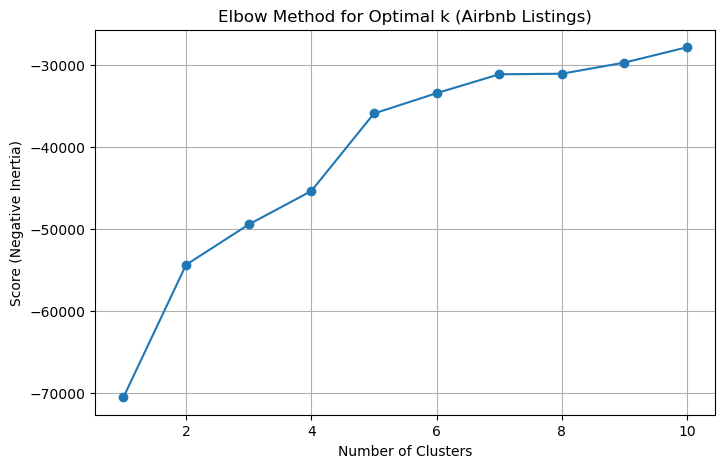

In [25]:
# 3. Plot the elbow curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(num_cl, score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Negative Inertia)')
plt.title('Elbow Method for Optimal k (Airbnb Listings)')
plt.grid(True)

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/elbow_method_airbnb.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now show the plot
plt.show()


### Choosing the Number of Clusters (Elbow Method)

In the elbow curve above, there is a significant drop in inertia from one to two clusters and again from two to three. However, after three clusters, the curve begins to flatten out, meaning that additional clusters bring only marginal improvements.

This suggests that **three clusters** is the optimal choice for this dataset. It balances capturing meaningful differences in the data while avoiding unnecessary complexity. Therefore, I will use **k = 3** for my clustering analysis.

### 5. k-means clustering

In [28]:
# Create the KMeans object with k = 3

kmeans = KMeans(n_clusters=3, random_state=42)

In [29]:
# Fit and predict the cluster labels for the scaled data

cluster_labels = kmeans.fit_predict(df_scaled)

### 6. Add cluster column to DataFrame

In [31]:
# Add the cluster labels as a new column to your scaled DataFrame

df_scaled['Cluster'] = cluster_labels

In [32]:
# Preview the result

df_scaled.head()

,Latitude,Longitude,Guests,Availability (30 days),Availability (365 days),Number of Reviews,Occupancy (last 365 days),Cluster
0,-0.128928,1.538091,-0.710396,0.319795,-0.660597,2.845671,2.447953,2
1,1.223722,0.068678,-0.710396,-0.176880,0.026099,2.005085,2.050233,2
2,0.068794,0.041393,-0.710396,-0.673555,-0.009117,5.100704,2.614738,2
3,-0.042279,0.046793,-0.710396,-0.474885,-0.009117,6.046363,2.614738,2
4,0.297337,0.717550,0.821547,-0.673555,-0.748635,-0.031719,-0.656825,0


In [33]:
df_scaled['Cluster'].value_counts()

Cluster
1    4065
0    3058
2    2952
Name: count, dtype: int64

### 7. Visualizations of the clusters (scatterplots etc.)

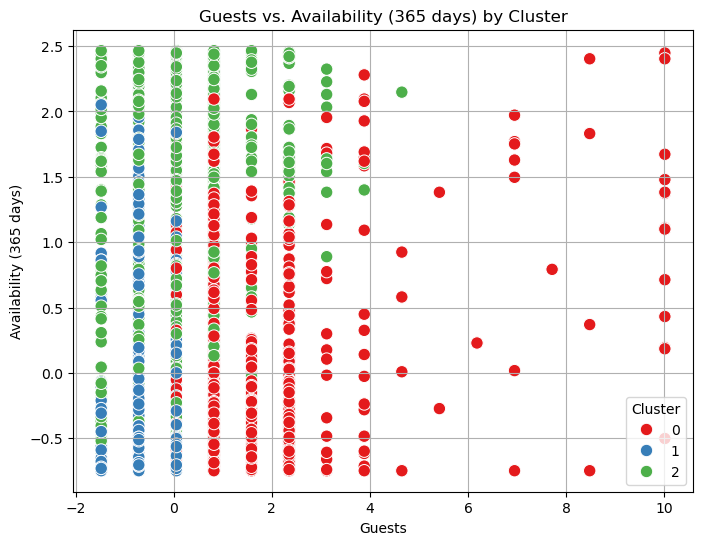

In [35]:
# Visualize clusters: Guests vs. Availability (365 days)
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_scaled,
    x='Guests',
    y='Availability (365 days)',
    hue='Cluster',
    palette='Set1',
    s=80
)

# Add title and labels
plt.title('Guests vs. Availability (365 days) by Cluster')
plt.xlabel('Guests')
plt.ylabel('Availability (365 days)')
plt.legend(title='Cluster')
plt.grid(True)

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/guests_vs_availability_by_cluster.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


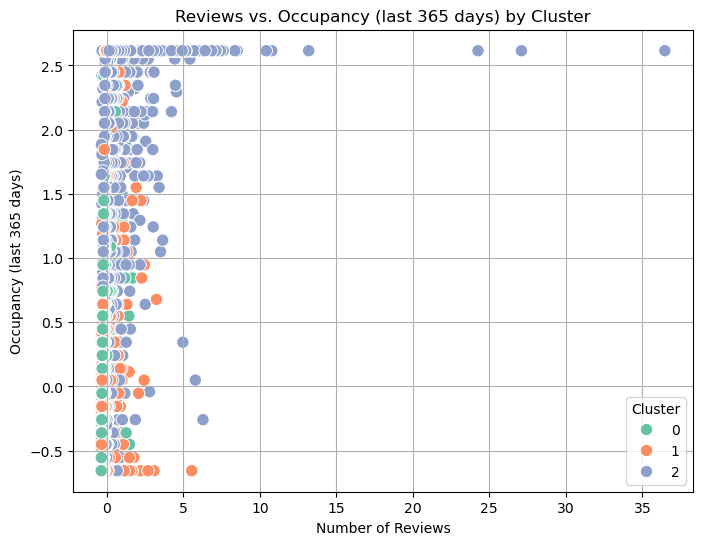

In [36]:
# Scatterplot: Number of Reviews vs. Occupancy, colored by cluster
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_scaled,
    x='Number of Reviews',
    y='Occupancy (last 365 days)',
    hue='Cluster',
    palette='Set2',
    s=80
)

# Add title and axis labels
plt.title('Reviews vs. Occupancy (last 365 days) by Cluster')
plt.xlabel('Number of Reviews')
plt.ylabel('Occupancy (last 365 days)')
plt.legend(title='Cluster')
plt.grid(True)

# Define file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/reviews_vs_occupancy_by_cluster.jpg"

# Save the figure BEFORE showing it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


### 8. Discussion: Does clustering make sense?

### Cluster Interpretation: Guests vs. Availability (365 days)

The scatterplot above shows how the listings group based on the number of guests they accommodate and their availability over the year.

- **Cluster 0 (red):** Larger listings, often for 4 or more guests. These listings show a wide range of availability and may represent entire homes or vacation rentals.
- **Cluster 1 (blue):** Small listings (1–2 guests) with lower availability. These might represent part-time rentals or shared rooms.
- **Cluster 2 (green):** Also small listings, but with consistently higher availability—possibly professional hosts with studios or private rooms available year-round.

The clusters make sense in the context of listing types and hosting styles. We can now explore them further using descriptive statistics.

### Cluster Interpretation: Reviews vs. Occupancy

This scatterplot visualizes how the listings group based on the number of reviews received and their occupancy over the past year.

- **Cluster 2 (blue):** Includes highly active listings with many reviews and consistently high occupancy. These are likely to be professionally managed or highly popular properties.
- **Cluster 1 (orange):** Listings with low review counts and varied occupancy. These might be new, occasionally rented, or seasonal listings.
- **Cluster 0 (green):** Listings with a small number of reviews but more stable occupancy. Possibly run by regular hosts with moderate traffic.

The clusters help distinguish different hosting styles and activity levels.

### 9. Descriptive statistics per cluster (groupby + agg)

In [41]:
# Insert cluster labels

df_cluster['Cluster'] = cluster_labels 

In [42]:
# Descriptive statistics per cluster (mean & median)

df_cluster.groupby('Cluster').agg({
    'Guests': ['mean', 'median'],
    'Availability (30 days)': ['mean', 'median'],
    'Availability (365 days)': ['mean', 'median'],
    'Number of Reviews': ['mean', 'median'],
    'Occupancy (last 365 days)': ['mean', 'median']
})

Guests        Availability (30 days)         \
             mean median                   mean median   
Cluster                                                  
0        4.299215    4.0               1.789078    0.0   
1        2.082903    2.0               1.696187    0.0   
2        2.669377    2.0              18.952913   22.0   

        Availability (365 days)        Number of Reviews         \
                           mean median              mean median   
Cluster                                                           
0                     39.896991    4.0         16.779922    8.0   
1                     26.407872    0.0         18.015252    7.0   
2                    212.527100  232.5        114.547087   27.0   

        Occupancy (last 365 days)         
                             mean median  
Cluster                                   
0                       24.649444   16.0  
1                       22.996556    8.0  
2                      117.526762   70.0

In [43]:
# Add color-based labels

df_cluster.loc[df_cluster['Cluster'] == 0, 'Cluster Label'] = 'green'
df_cluster.loc[df_cluster['Cluster'] == 1, 'Cluster Label'] = 'orange'
df_cluster.loc[df_cluster['Cluster'] == 2, 'Cluster Label'] = 'blue'

### 10. Potential Use of Clustering Results in Future Analysis

The results of this k-means clustering analysis provide valuable segmentation of Airbnb listings based on guest capacity, availability, reviews, and occupancy. These clusters can support future analytics in several ways:

- **Segmented Insights:** By analyzing metrics within each cluster, we can identify what makes high-performing listings different from others.
- **Personalized Recommendations:** Platforms could recommend hosting strategies tailored to each cluster type (e.g., increase availability, improve visibility).
- **Feature Engineering:** The cluster label can be added as a new feature in future machine learning models (e.g., price prediction, booking likelihood).
- **Targeted Marketing or Investment:** Understanding which listing types are most booked or most reviewed can help hosts or Airbnb focus their efforts.
- **Monitoring Performance Trends:** Clusters can be tracked over time to observe shifts in demand, behavior, or performance.

In short, clustering opens up new opportunities for pattern discovery and smarter decision-making across the analytics pipeline.

In [46]:
# Export data to csv

df_cluster.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_clustered.csv'), index=False)